### 雙變量函數繪圖 & 多變量函數的參數估計與極值計算  ( 作業繳交 : 1/2 )

#### 學習事項 :

- 學習繪製雙變量函數的立體圖。

- 繪製雙變量函數的等高線圖。

- 計算限制式與非限制式多變量函數的極值。

- 學習多變量模擬資料的生成。

- 解決混合常態與混合貝他分配的參數估計問題（normal and \beta mixture data）




### 範例 1 : 繪製 Mesh 與 Surface 立體圖

- 繪製函數 f(x,y) = $xe^{-x^2-y^2}$ 的立體網格圖（mesh(wireframe), surface)。

- 計算函數 f(x,y) 的最小值

注意事項與討論 :

- 學習如何寫出多變量函數的指令。

- 第一張圖稱為 mesh(wireframe) 圖，第二張稱為 surface 圖。

- 在指令 plot_wireframe 內的參數 “rstride” 與 “cstride” 用來控制網格的列與欄的密度，數值越小代表密度越高。讀者宜自行調整並觀察結果。

- 立體圖的觀賞角度有二： 仰角（elevation） 與水平角度（azimuth）. 一般而言，立體圖的兩個角度都必須經過調整,才能看到最好、最適合或最想呈現的部分，俟調整好後，紀錄兩個角度並放入指令參數中（view_init），以便讓每次的執行都能顯示出該觀賞角度。值得注意的是，在 jupyter notebook 的環境下，無法手動調整觀賞角度，必須在 python 環境才可以（py 檔）。

- Mesh 圖以網格線呈現立體模樣，而 surface 則是以塗滿色彩取代格線的立體圖並搭配色彩拼盤 cmap. 請參考 matplotlib 手冊中關於 color map 的使用，譬如 plt.cm.bone。

- surface 以色彩表達立體模樣，因此經常搭配一條 color bar 來表示高度數值。

- 雙變量圖格子需切少份，以便觀察  ( e.g : np.linspace(x1,x2,cut)，cut=10，圖上單軸會出現10條線 )

- 棋盤矩陣 = x,y 座標 ，然後藉由meshgrid產生 z 座標 

- x , y = 座標矩陣 ， np.meshgrid()以 broadcast 方式產生 z 座標矩陣

- rstrice : 調整 x 密度 ， cstrice : 調整 y 密度

- plot_wireframe : 圖形型態  plot_surface : 塗上顏色的plot_wireframe , 用 cmap 改顏色


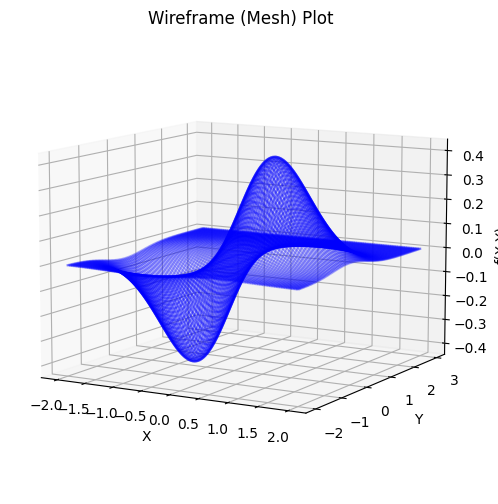

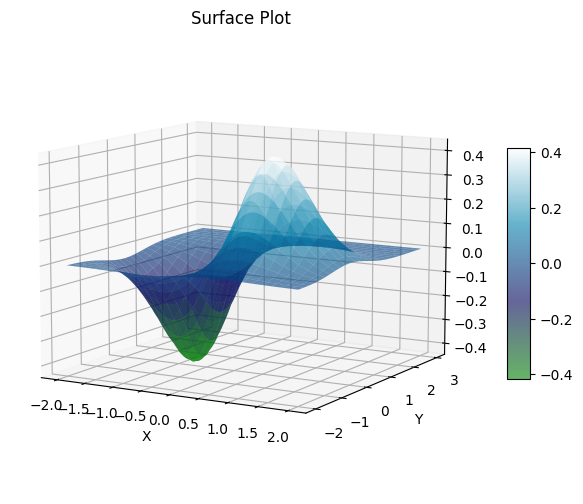

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
 
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
 
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x, y) # mesh grid matric ( 產生座標矩陣 )
Z = f([X, Y])
 
# for wireframe, control the wire density by rstride and cstride
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color ='blue',
    alpha=0.3, rstride = 1, cstride = 1) # rstride : x 密度 ， cstride : y 密度
ax.set_xlabel('X'), ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.title('Wireframe (Mesh) Plot')
plt.show()
 
# for surface 3D plot
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X, Y, Z, color = 'r', \
    rstride=4, cstride=4, alpha =0.6, cmap='ocean') # cmap = plt.cm.bone
 # cmap = plt.cm.bone
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10) # aspect = length/width ratio
ax.view_init(10, -60)  #(elev=-165, azim=60)
ax.set_xlabel('X'), ax.set_ylabel('Y')
plt.title('Surface Plot')
plt.show() 














### 範例 2：等高線圖 Contour plot

延續上個範例的函數, 繪製等高線圖

注意事項：

- 等高線的線條代表某個函數值。而函數值大小通常以線條顏色表達。

- 繪製等高線必須決定等高線的數量或等高線的高度。下列程式碼分別展示這兩種做法。

- 除了以線條來展現函數值的大小，指令 contourf 則是使用塗滿區域顏色的方式表達數值大小。

- 下列程式碼也示範了 colorbar 的進一步技巧。

- plt.contour() 畫等高線圖模組 ，等高線圖 : 選擇特定高度做呈現形成平面圖

- levels = 決定高度

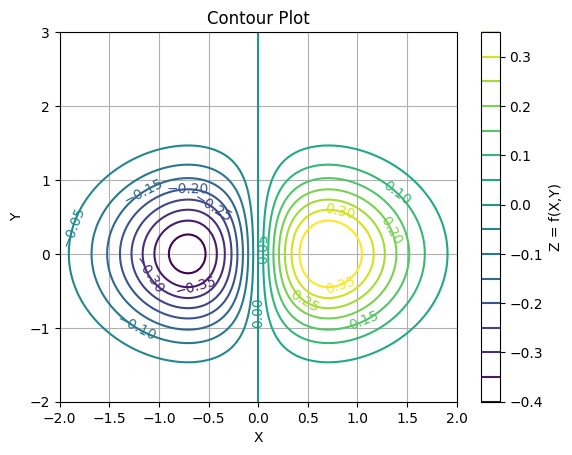

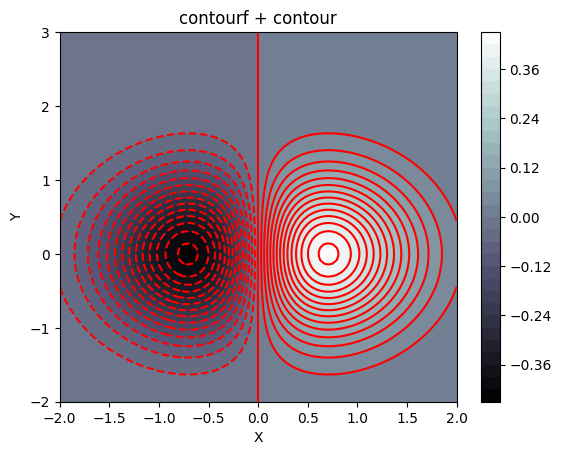

In [5]:

# To draw a contour plot
levels = np.arange(-0.4, 0.4, 0.05) # levels of contour lines
contours = plt.contour(X, Y, Z, levels=levels) # check dir(contours)
# add function value on each line    
plt.clabel(contours, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = plt.colorbar(contours)
plt.xlabel('X'), plt.ylabel('Y')
cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
# cbar.add_lines(contours) # add contour line levels to the colorbar 
plt.title('Contour Plot')
plt.grid(True)
plt.show()

C1 = plt.contourf(X, Y, Z, 30, \
    cmap = plt.cm.bone)
C2 = plt.contour(C1, levels = C1.levels, \
    colors = 'r') # check dir(contours)
plt.colorbar(C1)
plt.xlabel('X'), plt.ylabel('Y')
plt.title('contourf + contour')  
plt.show()

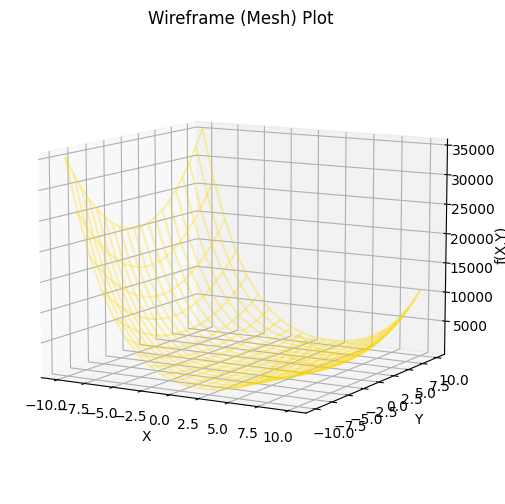

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 

f = lambda x1,x2 : (x1-2)**4+np.square(x1-2)*np.square(x2)+np.square(x2+1)

x= np.linspace(-10,10,20)
y= np.linspace(-10,10,20)
X,Y=np.meshgrid(x,y)
z=f(X,Y)

fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, z, color ='gold',
    alpha=0.3, rstride = 1, cstride = 1) # rstride : x 密度 ， cstride : y 密度
ax.set_xlabel('X'), ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.title('Wireframe (Mesh) Plot')
plt.show()






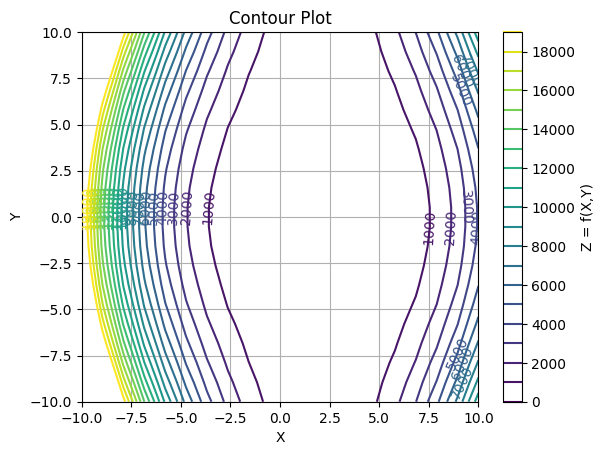

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 

levels = np.arange(0, 20000, 1000) # levels of contour lines
contours = plt.contour(X, Y, z,levels=levels) # check dir(contours)
# add function value on each line    
plt.clabel(contours, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = plt.colorbar(contours)
plt.xlabel('X'), plt.ylabel('Y')
cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
# cbar.add_lines(contours) # add contour line levels to the colorbar 
plt.title('Contour Plot')
plt.grid(True)
plt.show()

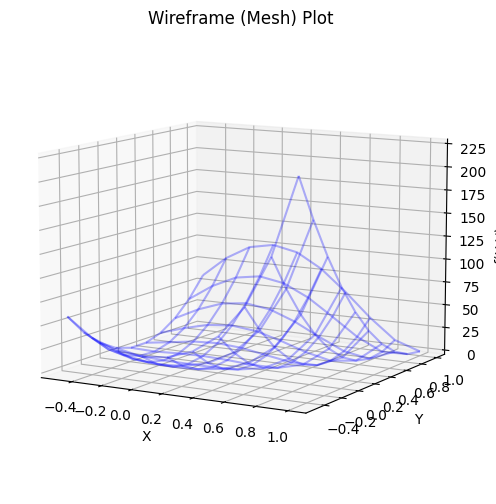

In [74]:
import numpy as np 
import matplotlib.pyplot as plt 

f_banana= lambda x,y : 100*np.square(y-np.square(x))+np.square(1-x)

x=np.linspace(-0.5,1,10)
y=np.linspace(-0.5,1,10)
X_b,Y_b=np.meshgrid(x,y)
Z_b=f_banana(X_b,Y_b)

fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X_b, Y_b, Z_b, color ='blue',
    alpha=0.3, rstride = 1, cstride = 1) # rstride : x 密度 ， cstride : y 密度
ax.set_xlabel('X'), ax.set_ylabel('Y')
ax.set_zlabel('f(X,Y)')
ax.view_init(10, -60)  #(elev=-165, azim=60)
plt.title('Wireframe (Mesh) Plot')
plt.show()

 

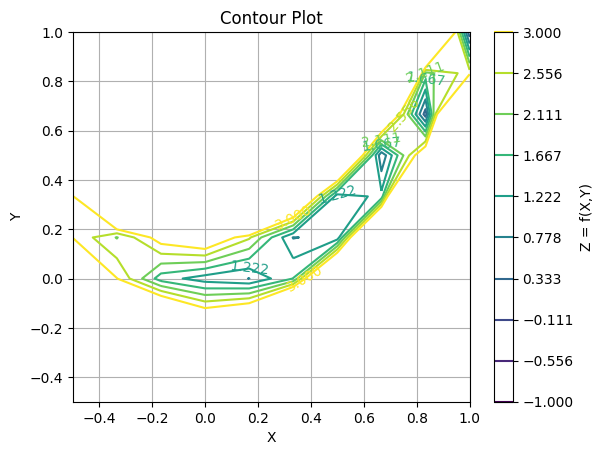

In [76]:
import numpy as np 
import matplotlib.pyplot as plt 

levels = np.linspace(-1,3,10) # levels of contour lines
contours = plt.contour(X_b, Y_b, Z_b,levels=levels) # check dir(contours)
# add function value on each line    
plt.clabel(contours, inline = 0, fontsize = 10) # inline =1 or 0 
cbar = plt.colorbar(contours)
plt.xlabel('X'), plt.ylabel('Y')
cbar.ax.set_ylabel('Z = f(X,Y)') # set colorbar label
# cbar.add_lines(contours) # add contour line levels to the colorbar 
plt.title('Contour Plot')
plt.grid(True)
plt.show()



#### 範例 3：限制式條件下的最小值問題 The constraint minimization

求解下列限制式條件的最小值

$\displaystyle \min_{x_1, x_2 \in \Omega} (x_1-2)^4 + (x_1-2)^2x_2^2 + (x_2+1)^2$

其中 $\Omega$ 分別為：

- $\Omega = \{x_1, x_2 \in R|\; x_1 \geq 0, x_2 \geq 0 \}$

- $\Omega = \{x_1, x_2 \in R|\; x_1 \leq 1, x_2 \leq 2 \}$

- $\Omega = \{x_1, x_2 \in R|\; 0 \leq x_1 \leq 1, 0 \leq x_2 \leq 2 \}$

- $\Omega = \{x_1, x_2 \in R|\; 0 \leq x_1 \leq \infty, -\infty \leq x_2 \leq 2 \}$

- $\Omega = \{x_1, x_2 \in R|\; x_1 +x_2 \leq 0.9 \}$

- $\Omega = \{x_1, x_2 \in R|\; 1.5 \leq x_1 +x_2 \leq 2 \}$

- $\Omega = \{x_1, x_2 \in R|\;  \sqrt{x_1^2 +x_2^2} \leq 1 \}$

- $\Omega = \{x_1, x_2 \in R|\;  \sqrt{x_1^2 +x_2^2} \leq 1, \; x_1x_2 \geq 0\}$

注意事項：

- 限制式條件包括線性與非線性的不等式（inequalities）.

- 限制式條件的最小值問題更常見於一般應用（較之於非限制條件）。

- 在本範例中，使用 scipy.optimize.minimize 計算限制式條件的最小值。

- 本題的非限制條件版，已在前面計算過，看看在限制式與非限制的條件下所得到的答案合不合理。

下列被註解的程式碼，建議不同的做法，讀者可以試試。

- 指令 minimize 也能用在非限制式條件的問題上，參考手冊上關於 minimize 與 fmin 之不同（ scipy.optimize）。


In [78]:
import scipy.optimize as opt
import numpy as np
 
f = lambda x: (x[0] - 2)**4 + (x[0] - 2)**2*x[1]**2 + (x[1]+1)**2
opts = dict(disp = True, maxiter=1e4)
# 1
cons = [{'type': 'ineq', 'fun': lambda x:  x[0]}, {'type': 'ineq', 'fun': lambda x:  x[1]}]
bnds = []
# 2: approach 1
# cons = []
# bnds = [(None, 1), (None,2)]
# 2: approach 2
# cons = [{'type': 'ineq', 'fun': lambda x: 1 - x[0]}, {'type': 'ineq', 'fun': lambda x: 2 - x[1]}]
# bnds = []
# 3
# cons = []
# bnds = [(0, 1), (0, 2)]
# 4
# cons = []
# bnds = [(0, np.inf), (-np.inf, 2)]
# 5
# cons = {'type': 'ineq', 'fun': lambda x:  -x[0] - x[1] + 0.9}
# bnds = []
# 6: approach 1
# cons = [{'type': 'ineq', 'fun': lambda x:  
#             x[0] + x[1] - 1.5},
#         {'type': 'ineq', 'fun': lambda x:  
#             -x[0] - x[1] + 2}]
# bnds = []            
# 6: approach 2
# A = [[1, 1], [-1, -1]]
# b = [-1.5, 2]
# cons = {'type': 'ineq', 'fun': lambda x:  
#             A @ x + b}
# bnds = [] 
# 6: approach 3
# A = [1, 1]
# lb, ub = 1.5, 2
# cons = opt.LinearConstraint(A, lb, ub)
# bnds = [] 
 
# 7: approach 1
# cons = {'type': 'ineq', 'fun': lambda x:  
#             1 - np.sqrt(x[0]**2 + x[1]**2) }
# 7: approach 2
# con = lambda x:  np.sqrt(x[0]**2 + x[1]**2)
# lb, ub = 0, 1
# cons = opt.NonlinearConstraint(con, lb, ub)
# bnds = []
# 8: 
# cons = [{'type': 'ineq', 'fun': lambda x:  
#             1 - np.sqrt(x[0]**2 + x[1]**2)},
#         {'type': 'ineq', 'fun': lambda x:  
#             x[0] * x[1]}]
# bnds = []
 
 
res = opt.minimize(f, x0=[0, 0], 
    bounds = bnds,
    constraints = cons,
    options = opts,
    tol = 1e-8)
# print(res)
print('x1 = {:.4f}, x2 = {:.4f}'.format(res.x[0], res.x[1]))
print('function value is {:.4f}'.format(res.fun))

ValueError: not enough values to unpack (expected 2, got 0)

#### 範例 3：無限制式條件下的多變量函數最小值 The unconstraint minimization

計算上一個範例中的多變量函數之最小值，即 $\displaystyle\min_{x, y} xe^{-x^2-y^2}$

注意事項與討論:

- 指令 scipy.optimize.fmin 用來計算多變量函數的最小值（區域最小值）。

- scipy.optimize.fmin 指令包含許多輸入參數，做為演算法收斂的依據，譬如 “maxiter = 1000” 定義了演算法的最大迴圈數為 1000; “maxfun = 1000” 則是限制函數計算的次數為 1000 次，限制次數的原因往往是該函數的計算過於耗時，無法承受太多次，只好停止演算，接受尚未真正收斂的結果; “disp = False” 表示不顯示執行結果的細節; “full_output = True” 會將最最後的最佳函數值輸出。 其他常用的重要參數還有 “xtol” 與 “ftol”，分別代表演算法執行過程中，當估計參數 x 的變化小於 “xtol” 與目標函數的變化小於 “ftol”，則停止演算法。 為方便這些參數的設定與使用，可以參考 dictionary list 的做法，請參考下列程式碼的最後兩行。

- 可以列印出輸出變數 “OptVal” 看看裡面有些甚麼。

- 指令 scipy.optimize.fmin 使用 downhill simplex 演算法，這個演算法不需要函數的任何導函數，因此適用於複雜，不易計算導函數的函數。



In [79]:
import numpy as np
import scipy.optimize as opt
 
f = lambda x : x[0] * np.exp(-x[0]**2 - x[1]**2)
OptVal = opt.fmin(func = f, x0 = [0, -1], maxiter = 1e3, maxfun = 1e3, disp = False, full_output = True)
print('The minimum occurrs at x = {:.4f}, y = {:.4f}'.format(OptVal[0][0], OptVal[0][1]))
print('The function vaule is {:.4f}'.format(OptVal[1]))
 
# Use a dictionary to express algorithmic parameters
opts = dict(disp = 1, xtol = 1e-6, ftol = 1e-6, maxfun = 1e4, maxiter = 1e4, full_output = True)
OptVal = opt.fmin(func = f, x0=[0, 0], **opts)

The minimum occurrs at x = -0.7071, y = 0.0000
The function vaule is -0.4289
Optimization terminated successfully.
         Current function value: -0.428882
         Iterations: 81
         Function evaluations: 157
